In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

In [2]:
from scipy import stats

Trying to illustrate why the standard error of the mean gets smaller as sample size increases.

# The normal distribution

When you take multiple measurements (samples) of a quantity then you end up with a distribution of values.
There are a lot of different statistical distributions, of which one of the most useful is the normal distribution.
Very common distribution, appearing in a lot of situations in nature, which is why it is called the normal distribution.

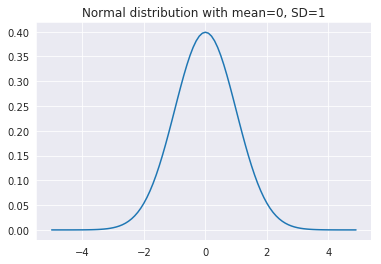

In [3]:
x_vals = np.arange(-5, 5, 0.1)
y_vals = stats.norm.pdf(x_vals)

fig, ax = plt.subplots(1)

ax.plot(x_vals, y_vals)
ax.set_title("Normal distribution with mean=0, SD=1");

To describe the shape of the normal distribution there are two parameters.
First there is the **mean**, which is where the centre peak of the normal distribution is.
The second parameter is the **standard deviation**, which describes how wide the distribution is.
A distribution with a larger standard deviation will be wider.

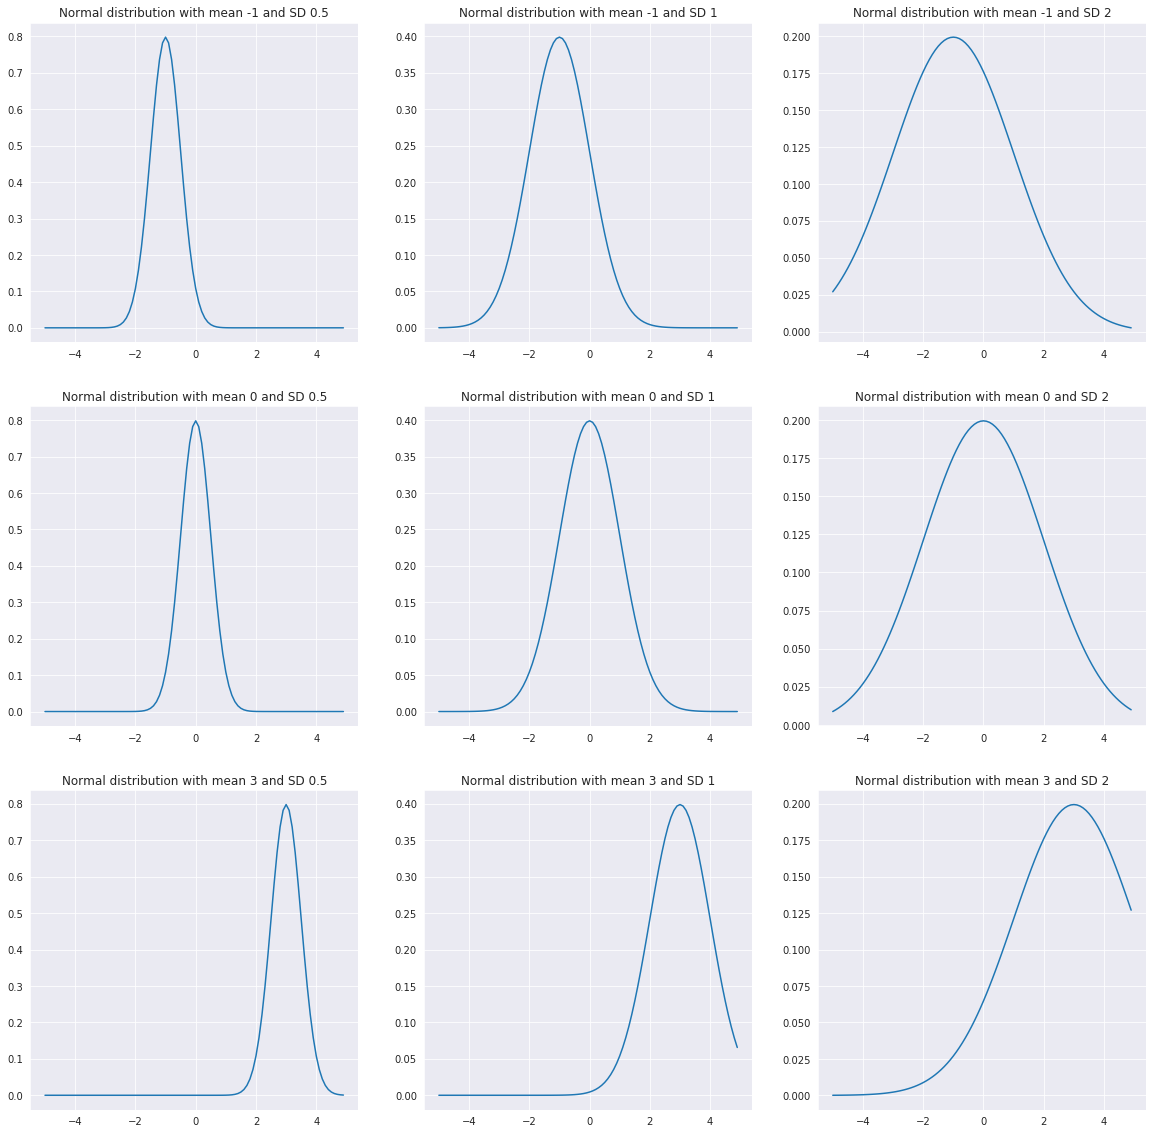

In [4]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))

sds = [0.5, 1, 2]
means = [-1, 0, 3]

for x, mean in enumerate(means):
    for y, sd in enumerate(sds):
        ax[x, y].plot(x_vals, stats.norm.pdf(x_vals, mean, sd))
        ax[x, y].set_title("Normal distribution with mean {mean} and SD {sd}".format(mean=mean, sd=sd))

When we compare statistical distributions, we often want to tell if the two distributions are the same, or if they're different to each other.

In this plot we have two normal distributions that have different means.
We can be pretty confident that the two distributions are different, because the area of overlap between them is small.

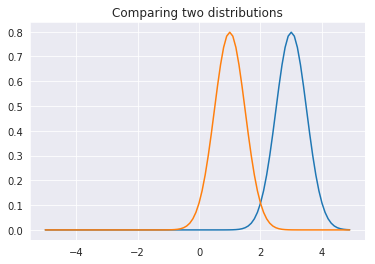

In [5]:
y1 = stats.norm.pdf(x_vals, loc=3, scale=0.5)
y2 = stats.norm.pdf(x_vals, loc=1, scale=0.5)

fig, ax = plt.subplots(1)

ax.plot(x_vals, y1)
ax.plot(x_vals, y2)
ax.set_title("Comparing two distributions");

Many analytics tools don't let you get to the raw data to see the distribution.
Usually you only get access to the mean value of each distribution. 
So to do a statistical comparison we use some properties of the normal distribution, 
to work around this limitation.

# Standard error

We use a property of the distribution called the _standard error_.
What this tells us is based on what we know about the mean value from our sample, and the sample size,
what can we say about the likely true value of the thing that we're trying to measure.

Let's do an example.
Say we have a website that has a conversion rate of $23.5\%$, meaning that $23.5\%$ of the time that someone visits the site they do a conversion event.

Let's measure the next 10 visits to our site and see if they convert.
In this table, 1 in the conversions column means that they converted.
(We model this as a Bernoulli trial that the convert or not).

In [6]:
conv = 0.235

conversions = stats.bernoulli(conv).rvs(10)
users = np.arange(len(conversions))

pd.DataFrame({
    "user_id": users,
    "conversions": conversions
})

,user_id,conversions
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,1
9,9,1


In [7]:
print("Total conversions={}\nConversion rate of {:.1%}".format(conversions.sum(), conversions.mean()))

Total conversions=2
Conversion rate of 20.0%


Let's repeat this for the next ten users.

In [8]:
conversions = stats.bernoulli(conv).rvs(10)
users = np.arange(len(conversions)) + 10

pd.DataFrame({
    "user_id": users,
    "conversions": conversions
})

,user_id,conversions
0,10,0
1,11,1
2,12,0
3,13,0
4,14,0
5,15,0
6,16,0
7,17,0
8,18,0
9,19,0


In [9]:
print("Total conversions={}\nConversion rate of {:.1%}".format(conversions.sum(), conversions.mean()))

Total conversions=1
Conversion rate of 10.0%


Our two small samples have different conversion rates.
Let's repeat this a lot of times.

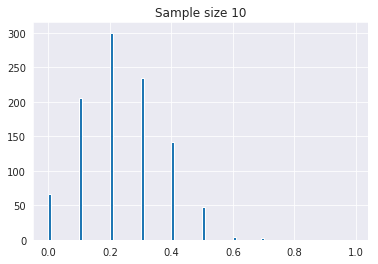

In [10]:
N = 10

conversion_rates = [
    stats.bernoulli(conv).rvs(N).mean() 
    for i in range(1000)
]

fig, ax=plt.subplots(1)
ax.hist(conversion_rates, bins=np.arange(0,1,0.01))
ax.set_title("Sample size {}".format(N));

With a small sample of 10, we mostly get a value close to 0.235,
but it isn't unusual to get values that are very far away from the true value.

Let's increase the sample size to 100 in each measurement sample.

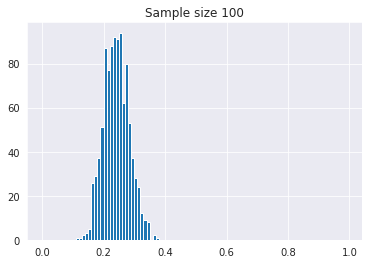

In [11]:
N = 100

conversion_rates = [
    stats.bernoulli(conv).rvs(N).mean() 
    for i in range(1000)
]

fig, ax=plt.subplots(1)
ax.hist(conversion_rates, bins=np.arange(0,1,0.01))
ax.set_title("Sample size {}".format(N));

You can see the dramatic effect increasing the sample size has.
Now more of the values we measure are close to the true value.

Increasing the sample size further to 1,000 makes the distribution even narrower, and any measured value becomes a very good representation of the true value.

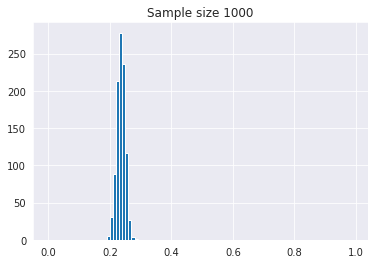

In [12]:
N = 1000

conversion_rates = [
    stats.bernoulli(conv).rvs(N).mean() 
    for i in range(1000)
]

fig, ax=plt.subplots(1)
ax.hist(conversion_rates, bins=np.arange(0,1,0.01))
ax.set_title("Sample size {}".format(N));

We are more certain that our measured value is close to the true value when we have a larger sample size.
We represent this by calculating the _standard error_:

$$
SE = \sqrt{\frac{p (1-p)}{N}}
$$

Where $p$ is the measured conversion rate that we have, and $N$ is the sample size.